In [12]:
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip insta％l "nbformat>=4.2.0"
%pip install -U kaleido


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "insta％l" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


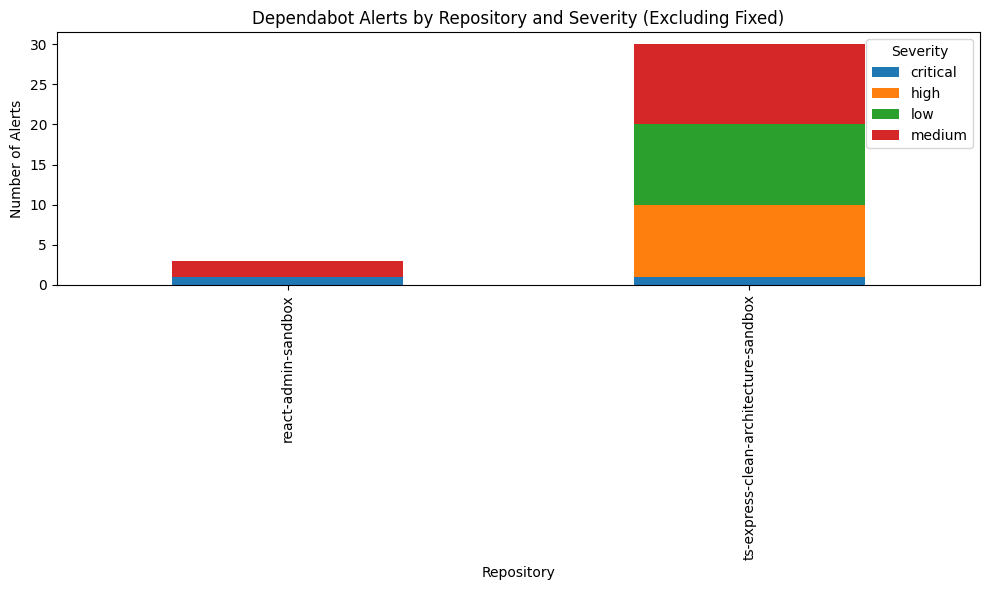

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ファイルの読み込み
csv_file = "../dependabot_alerts.csv"
df = pd.read_csv(csv_file)

# "fixed" 状態のアラートを除外する
df_filtered = df[df["state"].str.lower() != "fixed"]

# リポジトリと severity 別に件数を集計
df_counts = df_filtered.groupby(["repo", "severity"]).size().reset_index(name="count")

# pivot table を作成（行: repo, 列: severity, 値: count）
pivot = df_counts.pivot(index="repo", columns="severity", values="count").fillna(0)

# スタックドバーグラフの作成
ax = pivot.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Repository")
plt.ylabel("Number of Alerts")
plt.title("Dependabot Alerts by Repository and Severity (Excluding Fixed)")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import plotly.express as px

# CSV ファイルの読み込み
csv_file = "../dependabot_alerts.csv"
df = pd.read_csv(csv_file)

# "fixed" 状態のアラートを除外する
# .copy() を利用して明示的にコピーを作成し、SettingWithCopyWarning を回避
df_filtered = df[df["state"].str.lower() != "fixed"].copy()

# 誤記 "hight" を "high" に修正する（必要に応じて）
df_filtered["severity"] = df_filtered["severity"].replace("hight", "high")

# リポジトリと severity 別に件数を集計する
df_counts = df_filtered.groupby(["repo", "severity"]).size().reset_index(name="count")

# 積み上げの順序を指定します。
# 低い緊急度から積み上げ、critical が最上部に来るように指定
category_order = {"severity": ["low", "medium", "high", "critical"]}

# 色分けマップの設定（低い緊急度は青、高い緊急度は赤）
color_map = {
    "low": "blue",
    "medium": "gold",
    "high": "orange",
    "critical": "red"
}

# Plotly Express を用いて、スタックドバーグラフを作成
fig = px.bar(
    df_counts,
    x="repo",           # x軸: リポジトリ名
    y="count",          # y軸: アラート件数
    color="severity",   # 緊急度で色分け
    category_orders=category_order,
    color_discrete_map=color_map,
    title="Dependabot Alerts by Repository and Severity (Excluding Fixed)",
    labels={
        "repo": "Repository",
        "count": "Alert Count",
        "severity": "Severity"
    },
    barmode="stack"     # 積み上げ棒グラフに設定
)

# インタラクティブなグラフをブラウザで表示
fig.show()

# PDF にエクスポート（kaleido ライブラリが必要です）
fig.write_image("alerts_report.pdf", format="pdf")